# CSI5101 - Building and Querying Knowledge Graphs

### Learning Objectives

* Model knowledge as a graph of entities and relations
* Integrate external knowledge (Wikidata) into a local KG
* Perform questions answering (QA) over KGs (local + external)
* Identify difficulties in modeling and linking




### Team

*   Student A: Brent Palmer (300193610)

*   Student B: Ryan Rosenblatt (300502513)



### Submission Information

*   Make sure you follow the steps below and show your work to the TA DURING class time (February 3).  **Attendance/Participation/In-Class work is worth 3% of your activity.**
*   Complete the notebook (see the TODOs) and submit on Brightspace, in the Assignment section, under Activity 1.  **Deadline for final submission is Sunday February 8th, 11:59pm.** Late submission will be penalized 20% per day.  This is worth 5% of your activity.
* Make sure both members of the team submit, and that your names are both at the top of the notebook.  



### Disclaimer from professor Caroline Barrière

I created this starter notebook with the help of ChatGPT.  Through multiple exchanges, I was able to obtain the starter code that fitted my purpose: to show you how to build your own KG as well as query wikidata (external resource).  I am not an expert coder, and therefore I apologize ahead of time if some of the code is slightly obscur as it is a mix of home-made and AI-generated code.

Do not hesitate to make changes to the code if you find better/simpler ways of doing some operations.

### Activity 1 - Step by Step

**1. Setup and Imports**

In [2]:
import networkx as nx
import requests
from pprint import pprint

**2. Simple KG Modeling**

We use property graphs to model:
- Nodes (entities)
- Edges (relations)
- Node attributes (literals)

Suggested Entity Types (to extend)
- Person
- Place (refined to City, Country)
- Thing (refined to food, hobby, sport, actors, etc)
- Course
- Organization (refined to University)

Suggested Relation Types
- likes
- knows
- born_in
- lives_in
- studies_at
- has_topic
- has_colleague

In [45]:
G = nx.MultiDiGraph()

In [4]:
# These methods will allow us to construct the knowledge graphs with entities and relations (properties)
def add_entity(G, entity_id, label, entity_type):
    G.add_node(entity_id, label=label, type=entity_type)

def add_relation(G, source, relation, target):
    G.add_edge(source, target, relation=relation)

**3. Creating Personal KGs**

Each student would put information in the graph about themselves.
- At least 3 things you like (with their type)
- At least 2 people you know
- At least 1 thing each person you know likes
- Your birth city
- Your current city
- The university you study at
- At least 2 courses you are taking and who teaches them


** *Suggestion: as you compare your KGs, you will find identical entities.  Create an entity definition section that is common to both.  You will need to discuss/agree on the superclass of each entity*


**Identitical Entities**

In [46]:
add_entity(G, "knowledge_reps", "Knowledge Representation", "Course")
add_entity(G, "prof_cbarriere", "Caroline Barriere", "Person")
add_relation(G, "prof_cbarriere", "teaches", "knowledge_reps")
add_entity(G, "ottawa", "Ottawa", "City")
add_entity(G, "university_of_ottawa", "University of Ottawa", "Organization")

**3a. Student A Model**
***
*TODO: Modify and extend the KG started below to correspond to you. See requirements above.*
***

In [47]:
# Person A
add_entity(G,"SA", "Brent Palmer", "Person")

# 3 things I like
add_entity(G, "hockey", "Hockey", "Sport")
add_relation(G,"SA", "likes", "hockey" )

add_entity(G, "classical", "Classical", "Music")
add_relation(G,"SA", "likes", "classical" )

add_entity(G, "hamburger", "Hamburger", "Food")
add_relation(G,"SA", "likes", "hamburger" )

# 2 people I know
add_entity(G, "SAP1", "Sarah Goodstadt", "Person")
add_entity(G, "SAP2", "Owen Austin", "Person")
add_relation(G, "SA", "knows", "SAP1")
add_relation(G, "SA", "knows", "SAP2")

# 1 thing each person I know likes
add_entity(G, "crochet", "Crochet", "Hobby")
add_relation(G, "SAP1", "likes", "crochet")

add_entity(G, "pokemon", "Pokemon", "Hobby")
add_relation(G, "SAP2", "likes", "pokemon")

# My birth city
add_relation(G,"SA", "born_in", "ottawa" )

# My current city
add_relation(G,"SA", "lives_in", "ottawa" )

# The university I study at
add_relation(G, "SA", "studies_at", "university_of_ottawa")

# At least 2 courses you are taking and who teaches them
add_relation(G, "SA", "takes_course", "knowledge_reps")

add_entity(G, "probability_and_statics_for_engineers", "Probability and Statistics for Engineers", "Course")
add_entity(G, "prof_pboily", "Patrick Boily", "Person")
add_relation(G, "prof_pboily", "teaches", "probability_and_statics_for_engineers")
add_relation(G, "SA", "takes_course", "probability_and_statics_for_engineers")

**3b. Student B Model**
***
*TODO: Modify and extend the KG started below to correspond to you. See requirements above.*
***

In [48]:
add_entity(G,"SB", "Ryan Rosenblatt", "Person")

add_entity(G,"SBP1", "Kelly", "Person")
add_relation(G,"SB", "knows", "SBP1" )

add_entity(G, "iceskating", "Ice Skating", "Sport")
add_relation(G,"SBP1", "likes", "iceskating")

add_entity(G,"SBP2", "Max", "Person")
add_relation(G,"SB", "knows", "SBP2" )

add_entity(G, "snowboarding", "Snowboarding", "Sport")
add_relation(G,"SBP2", "likes", "snowboarding")



add_entity(G, "reading", "Reading", "Hobby")
add_relation(G,"SB", "likes", "reading" )

add_entity(G, "rock", "Rock", "Music")
add_relation(G,"SB", "likes", "rock" )

add_entity(G, "ramen", "Ramen", "Food")
add_relation(G,"SB", "likes", "ramen")

add_entity(G, "manhattan", "Manhattan", "City")
add_relation(G,"SB", "born_in", "manhattan" )

add_relation(G,"SB", "lives_in", "ottawa" )

add_relation(G,"SB", "studies_at", "university_of_ottawa" )

add_relation(G,"SB", "takes_course", "knowledge_reps" )

add_entity(G, "ecommerce", "Electronic Commerce Technologies", "Course")
add_relation(G,"SB", "takes_course", "ecommerce" )

add_entity(G, "prof_tran", "Thomas Tran", "Person")
add_relation(G,"prof_tran", "teaches", "ecommerce" )

**4. Inspect and Visualize your KGs**

***
*TODO: Using the visualization, make sure your KG does not contain any error.*  

*PLEASE NOTE: You must SHOW YOUR VISUALIZATION to the TA.*
***

In [10]:
print("Nodes:")
pprint(G.nodes(data=True))

print("\nEdges:")
pprint(list(G.edges(data=True)))


Nodes:
NodeDataView({'knowledge_reps': {'label': 'Knowledge Representation', 'type': 'Course'}, 'prof_cbarriere': {'label': 'Caroline Barriere', 'type': 'Person'}, 'ottawa': {'label': 'Ottawa', 'type': 'City'}, 'university_of_ottawa': {'label': 'University of Ottawa', 'type': 'Organization'}, 'SA': {'label': 'Brent Palmer', 'type': 'Person'}, 'hockey': {'label': 'Hockey', 'type': 'Sport'}, 'classical': {'label': 'Classical', 'type': 'Music'}, 'hamburger': {'label': 'Hamburger', 'type': 'Food'}, 'SAP1': {'label': 'Sarah Goodstadt', 'type': 'Person'}, 'SAP2': {'label': 'Owen Austin', 'type': 'Person'}, 'crochet': {'label': 'Crochet', 'type': 'Hobby'}, 'pokemon': {'label': 'Pokemon', 'type': 'Hobby'}, 'probability_and_statics_for_engineers': {'label': 'Probability and Statistics for Engineers', 'type': 'Course'}, 'prof_pboily': {'label': 'Patrick Boily', 'type': 'Person'}, 'SB': {'label': 'Ryan Rosenblatt', 'type': 'Person'}, 'SBP1': {'label': 'Kelly', 'type': 'Person'}, 'iceskating': {'l

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_kg(G, title="Knowledge Graph"):
    """
    Visualizes a KG with:
    - Node labels (from 'label')
    - Node colors based on 'type'
    - Edge labels (relation)
    """
    plt.figure(figsize=(10, 8))

    # Use spring layout for nice spacing
    pos = nx.spring_layout(G, seed=42)

    # Define colors for each type
    type_colors = {}
    color_palette = ['skyblue', 'lightgreen', 'orange', 'pink', 'violet', 'lightgrey']
    types = list({G.nodes[n].get("type") for n in G.nodes()})
    for i, t in enumerate(types):
        type_colors[t] = color_palette[i % len(color_palette)]

    # Node colors
    node_colors = [type_colors[G.nodes[n].get("type")] for n in G.nodes()]

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, alpha=0.9)

    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=2, alpha=0.7)

    # Node labels
    labels = {n: G.nodes[n].get("label") for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Edge labels
    edge_labels = {(u, v): data['relation'] for u, v, data in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

    # Legend for node types
    for t, color in type_colors.items():
        plt.scatter([], [], c=color, label=t, s=200)
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="Node Types")

    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


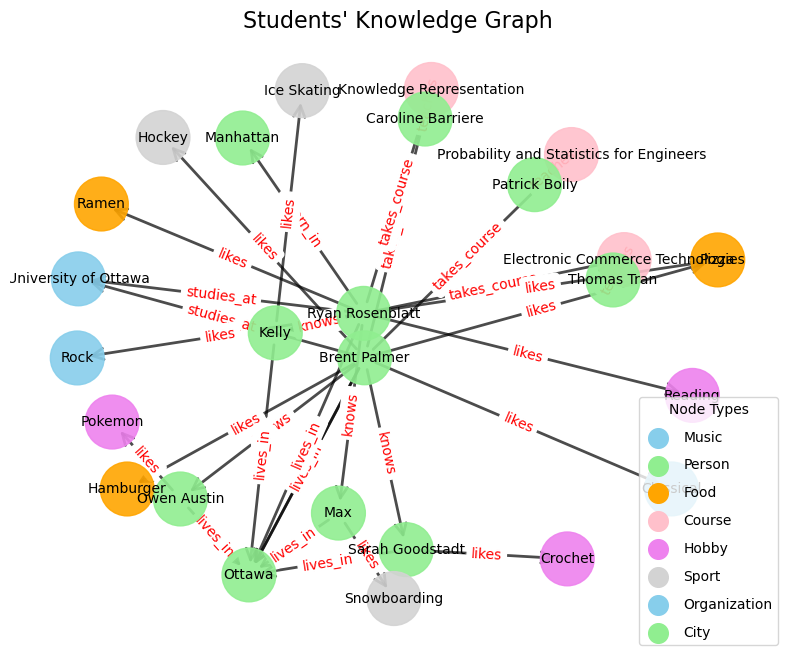

In [270]:
# Assuming your G already has SA, SB, entities and relations
visualize_kg(G, title="Students' Knowledge Graph")

In [13]:
import networkx as nx

def student_subgraph(G, student_id, hops=1):
    nodes = nx.single_source_shortest_path_length(G, student_id, cutoff=hops).keys()
    return G.subgraph(nodes)

In [14]:
G_SA = student_subgraph(G, "SA")
G_SB = student_subgraph(G, "SB")

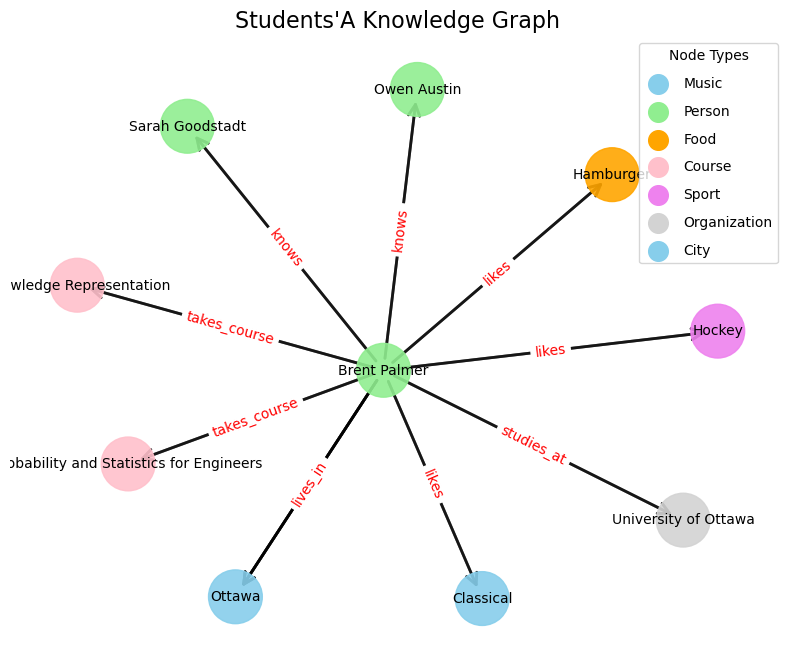

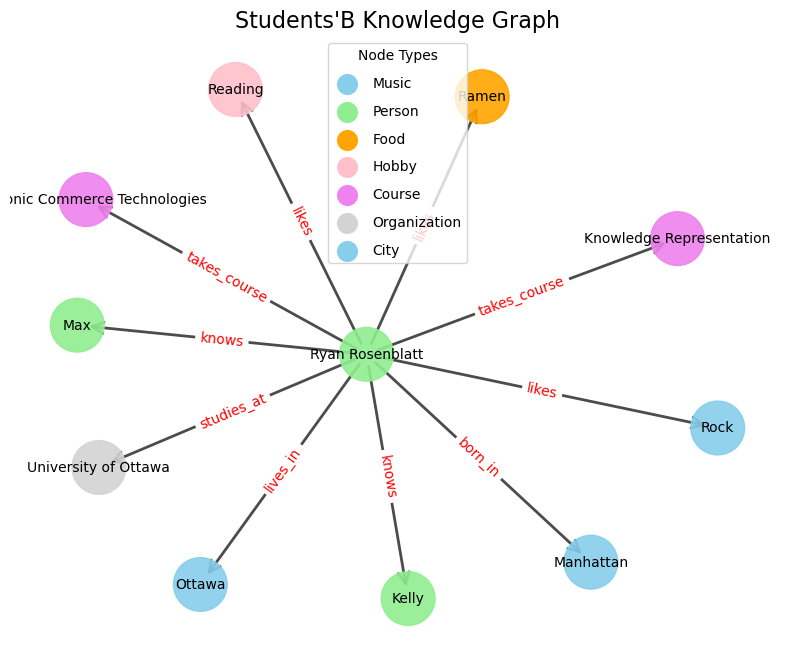

In [271]:
# Assuming a focus on a single student
visualize_kg(G_SA, title="Students'A Knowledge Graph")
visualize_kg(G_SB, title="Students'B Knowledge Graph")


**5. Exploring Wikidata**

Wikidata (https://www.wikidata.org/) is a very large community based resources structured using the RDF formalism of (Subject, Predicate, Object).

***
*TODO: Inspect manually online at least 5 entities of your choice (e.g. a city, a university, a musician, a famous building, etc).*

For each one, identify:
- its reference (ID)
- its superclass (could be more than one)
- its location (note which property name and ID is used to provide location -- there could be more than one)
- some other property that you find interesting
- some other property that you find quite strange

To answer, below, use one Text Cell per entity.

*PLEASE NOTE: You must SHOW THE RESULT OF YOUR EXPLORATION to the TA.*
***

Wikidata Entity 1 - International Space Station

---
reference ID: Q25271 <br />
superclasses: space stations, space laboratory, artificial satellite of the Earth <br />
location (P276): low Earth orbit (Q663611)  <br />
orbits completed: 146,495 <br />
astronomic symbol image: https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/ISS_symbol_%28fixed_width%29.svg/250px-ISS_symbol_%28fixed_width%29.svg.png

Wikidata Entity 2 - Catacombs of Paris

---
reference ID: Q28924 <br />
superclasses: museum, catacombs <br />
located on street (P669): place Denfert-Rochereau, avenue du Colonel-Henri-Rol-Tanguy (house number 1)  <br />
visitors per year: (split up by year out of order) 2018: 480,000, 2019: 601,900 <br />
activity policy in this place: drinking ban, photos allowed

Wikidata Entity 3 - Atlantis

---
reference ID: Q25373 <br />
superclasses: phantom island, mythical continent, mythological island, fictional island <br />
located in or next to body of water (P206): Atlantic Ocean <br />
locator map image: Atlantis map 1882 crop.jpg <br />
Internet Sacred Text Archive ID: atl/index

Wikidata Entity 4 - Hogwarts

---
Reference ID: Q174097 <br>
Superclasses: wizard school in Harry Potter universe <br>
location: Scotland <br>
Interesting Property: anthem: Hobby Warty Hogwarts <br>
Strange Property: spoken text audio: Wikipedia - Hogwarts (spoken by AI voice).mp3

Wikidata Entity 5 - Earth

---
Reference ID: Q2 <br>
Superclasses: inner planet of the Solar System, terrestrial planet, 
planet, geographic location <br>
location: inner Solar System, circumstellar habitable zone, 
Milky Way, Local Group <br>
Interesting Property: density: 5.513 gram per cubic centimetre <br>
Strange Property: number of out-of-school-children: 264,000,000 (2015)

**6. Accessing Wikidata's Sparql Endpoint**


Below is some wrapper code to search Wikidata.

You will notice:
- Polysemy: Notice how Ottawa can be the name of multiple cities.
- Entity and Relation encoding: Notice how entities and relations (properties) are concepts with unique IDs and what we really want are the labels (e.g. Q1930 is "Ottawa" and "P1082" is the "population" property.

***
*TODO: Instead of the example of getting the population for Ottawa, add code to obtain the population of another city (e.g. Toronto, Montreal), as well as the Mayor of Ottawa.*
***

In [17]:
# We can search for entities in Wikidata
# This helps retrieve the IDs from the labels
# Notice that labels are ambiguous whereas IDs are not

WIKIDATA_SEARCH_URL = "https://www.wikidata.org/w/api.php"

HEADERS = {
    "User-Agent": "CSI5101-KG-Exercise/1.0 (https://uottawa.ca)"
}

def wikidata_search(query, limit=1):
    params = {
        "action": "wbsearchentities",
        "search": query,
        "language": "en",
        "format": "json",
        "limit": limit
    }
    response = requests.get(
        WIKIDATA_SEARCH_URL,
        params=params,
        headers=HEADERS,
        timeout=10
    )
    response.raise_for_status()
    return response.json()["search"]


In [18]:
# Result ranking is ofter performed by popularity of the entity
results = wikidata_search("Ottawa", limit=5)

for r in results:
    print(r["id"], "-", r["label"], "-", r.get("description"))

Q1930 - Ottawa - capital city of Canada
Q993732 - Ottawa - village in Ohio, United States
Q1913965 - Ottawa - city in Kansas, United States
Q576209 - Ottawa - city in Illinois, United States
Q536116 - Odawa - indigenous people in what is known as Michigan and Ontario


In [19]:
# retrieving the identifier
city_qid = results[0]["id"]
print(city_qid)

Q1930


In [20]:
# We can use Sparql queries (use wikidata sparql endpoint) to get the object of particular relations
# Here is a generic method that will send the specified query and obtain a response

WIKIDATA_SPARQL_URL = "https://query.wikidata.org/sparql"

def wikidata_sparql(query):
    headers = {"Accept": "application/sparql+json"}
    response = requests.get(
        WIKIDATA_SPARQL_URL,
        params={"query": query, "format": "json"},
        headers=headers
    )
    response.raise_for_status()
    return response.json()


In [21]:
# Here is an example of performing a Sparql Query to obtain a population of a city
# Remember the RDF format as a triple Subject, Predicate, Object.

def get_city_population(city_qid):
    query = f"""
    SELECT ?population WHERE {{
      wd:{city_qid} wdt:P1082 ?population .
    }}
    """
    results = wikidata_sparql(query)
    bindings = results["results"]["bindings"]
    return int(bindings[0]["population"]["value"]) if bindings else None


In [22]:
# We do it for Ottawa (ID = Q1930)
get_city_population("Q1930")

1017449

In [23]:
# TO DO:
# Population of Vancouver (ID = Q24639)
get_city_population("Q24639")


662248

In [25]:
# TO DO:

def get_city_mayor(city_qid):
    query = f"""
    SELECT ?mayor WHERE {{
      wd:{city_qid} wdt:P6 ?mayor .
    }}
    """
    results = wikidata_sparql(query)
    bindings = results["results"]["bindings"]

    if bindings is None:
        return None
    
    mayor_id = bindings[0]["mayor"]["value"].split("/")[-1]

    name_query = f"""SELECT ?name WHERE {{
      wd:{mayor_id} rdfs:label ?name.
    }}"""
    name_results = wikidata_sparql(name_query)
    bindings = name_results["results"]["bindings"]

    return bindings[0]["name"]["value"] if bindings else None

# Mayor of Ottawa
get_city_mayor("Q1930")

'Mark Sutcliffe'

**7. Simple QA over your KG + Wikidata**

This section is to explore QA (you will be asked later to write code for different types of questions).

For example:
- "What is the population of the city Student A was born in?"
- "In which country was Student B born in?"

***
*TODO: Extend the code below to answer the questions above.  Below, the method "get_info" is called using a predefined city (Ottawa).  You are asked to modify that city to be automatically extracted from YOUR local KG, and then automatically extract the QID corresponding to that city from Wikidata.*
***

In [60]:
# This method is a generalization of the get_population we saw before
# Instead of writing a method for each property, we should have a method that is generic enough to take
# an entity identifier, and a property identifier and returning the object

# The information returned is either the label (default) or the entity ID which is useful if we wish to use this ID to continue the query
def get_info(entity_qid, relation_id, return_qid=False):
    """
    Fetch the value of a Wikidata property for an entity.

    Args:
        entity_qid (str): Wikidata QID (e.g., 'Q1930')
        relation_id (str): Property P-ID (e.g., 'P17')
        return_qid (bool): If True, returns QID of entity objects for chaining

    Returns:
        str: human-readable label or literal, or QID if return_qid=True
    """
    query = f"""
    SELECT ?value ?valueLabel
    WHERE {{
      wd:{entity_qid} wdt:{relation_id} ?value .
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 1
    """
    results = wikidata_sparql(query)
    bindings = results["results"]["bindings"]
    if not bindings:
        return None

    val = bindings[0]["value"]["value"]

    # If chaining, return QID for entities
    if return_qid and val.startswith("http://www.wikidata.org/entity/"):
        return val.split("/")[-1]  # returns e.g., "Q16"

    # Otherwise, prefer human-readable label if available
    return bindings[0].get("valueLabel", {}).get("value") or val


In [61]:
# Notice that the Entity Identifiers and Property Identifiers need to be known

# Ottawa population
pop = get_info("Q1930", "P1082")
print("Population:", pop)

# Ottawa country
country = get_info("Q1930", "P17")
print("Country:", country)

Population: 1017449
Country: Canada


In [75]:
SA_born_in = [v for u, v, data in G.edges(data=True) if data.get('relation') == 'born_in' and u == 'SA'][0]
SA_born_in_ID = wikidata_search(SA_born_in, limit=1)[0]['id']
pop = get_info(SA_born_in_ID, "P1082")
print(f"Student A's Birth City Population: {pop}")

SB_born_in = [v for u, v, data in G.edges(data=True) if data.get('relation') == 'born_in' and u == 'SB'][0]
pop = get_info(wikidata_search(SB_born_in, limit=1)[0]['id'], "P17")
print(f"Student B's Birth City Country: {pop}")

Student A's Birth City Population: 1017449
Student B's Birth City Country: United States


**8. More complex (double-hop) QA over mixed KG + Wikidata**

Since Wikidata is a graph, we can continue "hopping" on the graph to obtain information that is associated with entities more and more remote from the origin.

For example, we start with you (Student A or B), find the city you were born in from your local KG, then use Wikidata to find the Country associated with your birth city, then continue on Wikidata to obtain the population of that country.

We have:  student → birth city → country → population

***
*TODO: Once again. Adapt the code below Extend the code below to answer the questions above.  Below, the method "get_info" is called using a predefined city (Ottawa).  You are asked to modify that city to be automatically extracted from YOUR local KG, and then automatically extract the QID corresponding to that city from Wikidata.*
***

In [76]:

city_qid = SA_born_in_ID

# Step 1: Get country QID (for chaining)
country_qid = get_info(city_qid, "P17", return_qid=True)
print("Country QID:", country_qid)  # Should be 'Q16'

# Step 2: Get country population
population = get_info(country_qid, "P1082")
print("Population of the country:", population)

Country QID: Q16
Population of the country: 36991981


**9. QA over joint KGs (information from both students)**

We are back to looking at your local KG and investigate similarities between students.  Below you see code for anything that both students like.

***
*TODO: Adapt/modify the code so that it would find specific types liked by both students. What are the sports liked by both students? What are the food items liked by both students?*
***

In [160]:
def common_likes(graph, student_a, student_b):
    """
    Return the set of entities that both students like.
    """
    def liked_by(student):
        return {target for source, target, data in graph.edges(student, data=True)
                if data.get("relation") == "likes"}

    likes_a = liked_by(student_a)
    likes_b = liked_by(student_b)

    # Gets the type for nodes which are in all nodes if that node name is within likes_a
    # types_a = [graph.nodes[node].get("type") for node in graph.nodes if node in likes_a]

    # types_b = [graph.nodes[node].get("type") for node in graph.nodes if node in likes_b]

    # types_aT = []
    # for node_id in likes_a:
    #     types_aT.append(graph.nodes[node_id].get("type"))
    # print(types_aT)
                       
    def types_liked(student):
        likes = liked_by(student)
        types = []
        
        for liked_node_id in likes:
            types.append(graph.nodes[liked_node_id].get("type"))
            
        return set(types)

    return types_liked(student_a) & types_liked(student_b)  # intersection



In [161]:
common = common_likes(G, "SA", "SB")
print("Both students like:", common)

{'Food', 'Sport', 'Music'}
{'Food', 'Hobby', 'Music'}
Both students like: {'Food', 'Music'}


**10. QUESTION ANSWERING**

***
*TODO:*
You are asked to further explore the construction of your local KG and the use of the external KG as to answer the following questions.

Some of the questions below are the same (or very similar) to explorations you have performed before.
***

**Questions 1 to 3:**

*Use of local KG, Single-Hop.*

- Q1: What foods does StudentA (or StudentB) like?
- Q2: Which city does StudentA (or StudentB) live in?
- Q3: What music genres does StudentA (or StudentB) like?

*Please note that if you included Sports or Movies or other categories instead of Food and Music, that's fine... just adapt the questions to what you have included.*


In [223]:
def get_relation_data(graph, student, relation, node_type):
    return {target for source, target, data in graph.edges(student, data=True)
                if (data.get("relation") == relation) and (graph.nodes[target].get("type") == node_type)}


In [224]:
# Q1 -
get_relation_data(G, "SA", "likes", "Food")

{'hamburger'}

In [225]:
# Q2 -
get_relation_data(G, "SA", "lives_in", "City")

{'ottawa'}

In [226]:
    
# Q3 -
get_relation_data(G, "SA", "likes", "Music")

{'classical'}

**Questions 4 to 6:**

*Use of local KG, Douple-Hop.*

- Q4: What cities do the people StudentA (or StudentB) knows live in?
- Q5: What sports do the people StudentA (or StudentB) knows like?
- Q6: What food are liked by both StudentA and StudentB?

*Please note that if you included Sports or Movies or other categories instead of Food and Music, that's fine... just adapt the questions to what you have included.*

In [183]:
add_relation(G,"SAP1", "lives_in", "ottawa")
add_relation(G,"SAP2", "lives_in", "ottawa")
add_relation(G,"SBP1", "lives_in", "ottawa")
add_relation(G,"SBP2", "lives_in", "ottawa")

In [254]:
def double_hop(graph, student, relation, node_type, sub_relation, sub_type):
    sub_data = get_relation_data(graph, student, relation, node_type)

    sub_results = set()
    for sources in sub_data:
        sub_results = {*sub_results, *get_student_data(graph, sources, sub_relation, sub_type)}
    return sub_results


In [255]:
# Q4 -
double_hop(G, "SA", "knows", "Person", "lives_in", "City")

{'ottawa'}

In [256]:
# Q5 -
double_hop(G, "SB", "knows", "Person", "likes", "Sport")

{'iceskating', 'snowboarding'}

In [237]:
add_entity(G, "pizza", "Pizza", "Food")
add_relation(G,"SA", "likes", "pizza")
add_relation(G,"SB", "likes", "pizza")


In [260]:
# Q6 -
print(set.intersection(get_relation_data(G, "SB", "likes", "Food"), get_relation_data(G, "SA", "likes", "Food")))

{'pizza'}


**Questions 7 to 9:**

*Use of Wikidata, Single-Hop lookup.*

- Q7: What is the population of the city where Student A (or StudentB) lives?
- Q8: In which country is the city where Student A (or StudentB) was born?
- Q9: .... (your choice) What is the country of origin of a food that Student A (or StudentB) likes?


In [309]:
# Q7 -
SA_lives_in = list(get_relation_data(G, "SA", "lives_in", "City"))[0]
SA_lives_in_ID = wikidata_search(SA_lives_in, limit=1)[0]['id']
pop = get_info(SA_lives_in_ID, "P1082")
print(f"The city that student A lives in is {list(SA_lives_in)[0].capitalize()} whose population is: {pop}")

The city that student A lives in is O whose population is: 1017449


In [308]:
# Q8 -
SB_born_in = list(get_relation_data(G, "SB", "born_in", "City"))[0]
SB_born_in_ID = wikidata_search(SB_born_in, limit=1)[0]['id']
pop = get_info(SB_born_in_ID, "P1082")
print(f"Student B's Birth City Population: {pop}")

Student B's Birth City Population: 1694251


In [303]:
# Q9 -
food_A_likes = list(get_relation_data(G, "SA", "likes", "Food"))[0]
food_A_likes_ID = wikidata_search(food_A_likes, limit=1)[0]['id']
food_origin_country = get_info(food_A_likes_ID, "P495")
print(f"The origin of {food_A_likes} is {food_origin_country}") 

The origin of pizza is Italy


**Questions 10 to 12:**

*Use of Wikidata, Double-Hop lookup.*

- Q10: What is the population of country where Student A (or StudentB) lives?
- Q11: What is the capital city of the country where StudentA (or StudentB) was born?
- Q12: .... (your choice) What is the date of birth of the founder of the university where Student A (or StudentB) attends?


In [304]:
# Q10 -
city_qid = SA_lives_in_ID

# Step 1: Get country QID (for chaining)
country_qid = get_info(city_qid, "P17", return_qid=True)
print("Country QID:", country_qid)

# Step 2: Get country population
population = get_info(country_qid, "P1082")
print("Population of the country:", population)

Country QID: Q16
Population of the country: 36991981


In [253]:
# Q11 -
city_qid = SA_born_in_ID

# Step 1: Get country QID (for chaining)
country_qid = get_info(city_qid, "P17", return_qid=True)
print("Country QID:", country_qid)

# Step 2: Get country capital city
capital_city = get_info(country_qid, "P36")
print("Capital city of the country:", capital_city)

Country QID: Q16
Capital city of the country: Ottawa


In [316]:
# Q12 -
SA_studies_at = list(get_relation_data(G, "SA", "studies_at", "Organization"))
SA_studies_at_id = wikidata_search(SA_studies_at, limit=1)[0]['id']

# Step 1: Get the university founder's QID (for chaining)
founder_qid = get_info(SA_studies_at_id, "P112", return_qid=True)
print("Founder's QID:", country_qid)

# Step 2: Get the founder's date of birth
founder_dob = get_info(founder_qid, "P569")
print("The founder's DOB is: ", founder_dob)

Founder's QID: Q16
The founder's DOB is:  1805-08-26T00:00:00Z


**11. REFLECTION - READING - DISCUSSION**

***
*TODO:*
Now that you have created a small Knowledge Graph and used a community based Knowledge Graph, what are your thoughts with regards to:

- Modeling effort and difficulties
- Reliability of community based KGs
- Difficulties of linking your local KG to a community based KG (discuss the notion of polysemy)
***


**Modeling Effort and Difficulties**
Creating the abstraction layer to get the data back took a good portion of the assignment. It was difficult to conceptualize the inverse of the graph relationship in code so it could be referenced when answering the questions. Additionally, the scope of knowledge graphs seems to grow rapidly as we could see with the models that it was hard to see each individual relationship even at the relatively small scale.


**Reliability of Community Based KGs**
Community based KGs seem like they would be less prone to errors if they are critically looked at and relied upon frequently, but could likely experience problems with bad actors or confusing nomenclature. The expansive list of attributes provides rich data, but a lot of seemingly useless datapoints that could cause issues when not searching with precise IDs.


**Difficulties of Linking Your Local KG to a Community Based KG (discuss the notion of polysemy)**


- rock example